In [1]:
import os
data_dir = "../cell_images/"
os.listdir(data_dir)

['test', 'train']

# Standard Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To read Images we will import:
from matplotlib.image import imread

# Exploring Data Paths

In [4]:
test_path = data_dir + "test"
train_path = data_dir + "train"

In [5]:
train_path

'../cell_images/train'

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
parasitized_path = train_path + "/parasitized"

In [8]:
os.listdir(parasitized_path)

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [9]:
example_image = parasitized_path + "/C100P61ThinF_IMG_20150918_144104_cell_162.png"
example_image

'../cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

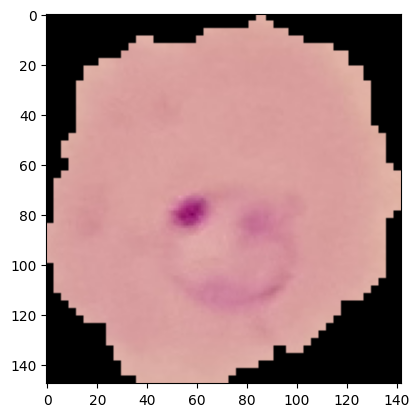

In [10]:
plt.imshow(imread(example_image));

In [11]:
uninfected_path = train_path + "/uninfected"

In [12]:
os.listdir(uninfected_path)[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

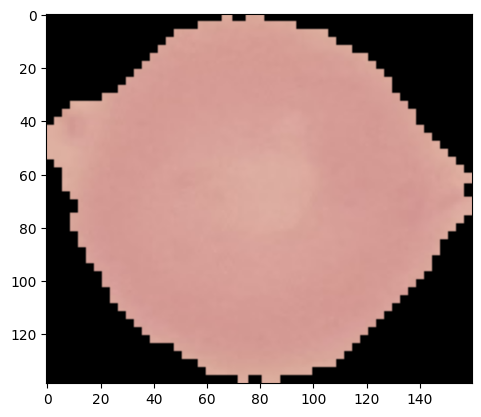

In [13]:
plt.imshow(imread(uninfected_path + "/C100P61ThinF_IMG_20150918_144104_cell_128.png"))

In [14]:
len(os.listdir(parasitized_path)), len(os.listdir(uninfected_path))

(12480, 12480)

In [15]:
len(os.listdir(test_path + "/parasitized")), len(os.listdir(test_path + "/uninfected"))

(1300, 1300)

# Finding Dimensions
And Deciding Average Dimensions

In [16]:
dim1 = []
dim2 = []

for image_names in os.listdir(test_path + "/uninfected"):
    
    img = imread(test_path + "/uninfected/" + image_names)
    d1, d2 , colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [17]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


In [18]:
np.mean(dim1) , np.mean(dim2)

(130.92538461538462, 130.75)

So we will Set all the images to THIS shape as this is the average dimension of the image

In [19]:
image_shape = (130,130,3)

In [20]:
130*130*3

50700

So there are going to be 50700 datapoints, that is much larger than MNIST: 784, and CIFAR-10: 32*32*3

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**NOTE** We had 60,000 images for CIFAR-10, which is quite sufficiently enough, but here, we only have 30,000 image samples,

We Definetely need more images, but cant collect more data by ourselves

So we will transform images keeping the same labels, like rotating the image, shifting the image a bit

In [22]:
image_gen = ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.1, 
    horizontal_flip=True, 
    fill_mode="nearest")

#### Rotation Range
        Rotating the image by how many degrees? 
        Note that rotating here by 360 is ok since our images, rn, is a circle/blob, it wont matter muchh if we rotate it much,
        BUT on images of faces, rotating by 180 degrees is not correct
#### Width_hift_range and height_shift_range:
        Shifting the image on x axis and, y_axis a bit respecively
#### Shear range: 
        Cut off some portion of the existing image
#### Zoom Range:
        Zooming the image by some percent
#### Horizontal Flip
        Flipping the image horizontally
#### FILL MODE:
        Filling the blank space how?
        Nearest: filling values by taking the pixel color values of the nearest pixel.

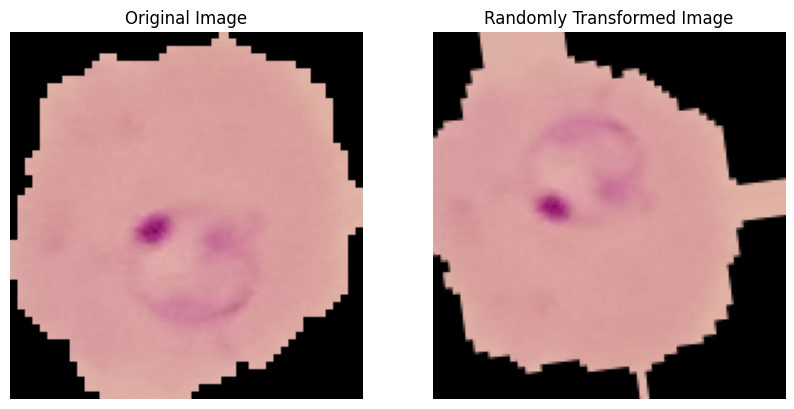

In [23]:
image = imread(example_image)

# Generate a randomly transformed version of the example image
random_transformed_image = image_gen.random_transform(image)

# Plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Plot the randomly transformed image
axes[1].imshow(random_transformed_image)
axes[1].set_title("Randomly Transformed Image")
axes[1].axis('off')

# Display the plot
plt.show()


### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

**OTHERWISE THIS WONT WORK**

In [24]:
os.listdir(train_path)

['parasitized', 'uninfected']

So we do have like Class_1, Class_2 Folder

In [25]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [26]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Building a Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [28]:
model = Sequential()

# CNN,Pooling Layers
model.add(Conv2D(filters=32, 
                kernel_size=(3,3), 
                strides=(1,1), 
                padding="same", 
                input_shape=image_shape, 
                activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, 
                kernel_size=(3,3), 
                strides=(1,1), 
                padding="same", 
                input_shape=image_shape, 
                activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, 
                kernel_size=(3,3), 
                strides=(1,1), 
                padding="same", 
                input_shape=image_shape, 
                activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten The CNN Layers
model.add(Flatten())

# Add a few Dense Layers if you want.
model.add(Dense(128, activation="relu"))
# Drop 50% of nuerons randomly to prevent overfitting
model.add(Dropout(0.5))

# Output Layer: BINARY CLASSIFICATION: MALARIA OR NOT: SO activation = sigmoid
model.add(Dense(1, activation="sigmoid"))

# Compile the model: BINARY CLASS: binary_crossentropy
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 65, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = "val_loss", patience=3)

# Generating Images

Also: Creating Batches  
Training our model on x images at a time, smaller the batch size, larger the time taken

In [31]:
image_shape[:2]

(130, 130)

In [32]:
batch_size=16

train_image_gen = image_gen.flow_from_directory(train_path, 
                                                target_size=image_shape[:2],
                                                color_mode="rgb",
                                                batch_size=batch_size,
                                                class_mode="binary")


test_image_gen = image_gen.flow_from_directory(test_path, 
                                                target_size=image_shape[:2],
                                                color_mode="rgb",
                                                batch_size=batch_size,
                                                class_mode="binary",
                                                shuffle=False) # For test data shuffle should be off

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [33]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

# Training Model

In [34]:
results = model.fit(train_image_gen, 
                            epochs=40,
                            validation_data=test_image_gen,
                            callbacks=[early_stopping])

Epoch 1/40
1560/1560 [==============================] - 144s 90ms/step - loss: 0.8260 - accuracy: 0.5456 - val_loss: 0.6851 - val_accuracy: 0.5473
Epoch 2/40
1560/1560 [==============================] - 133s 85ms/step - loss: 0.6844 - accuracy: 0.5616 - val_loss: 0.6753 - val_accuracy: 0.5781
Epoch 3/40
1560/1560 [==============================] - 152s 97ms/step - loss: 0.6872 - accuracy: 0.5707 - val_loss: 0.6878 - val_accuracy: 0.5262
Epoch 4/40
1560/1560 [==============================] - 148s 95ms/step - loss: 0.6889 - accuracy: 0.5454 - val_loss: 0.6826 - val_accuracy: 0.5696
Epoch 5/40
1560/1560 [==============================] - 139s 89ms/step - loss: 0.6399 - accuracy: 0.6081 - val_loss: 0.3167 - val_accuracy: 0.9119
Epoch 6/40
1560/1560 [==============================] - 151s 97ms/step - loss: 0.3031 - accuracy: 0.8800 - val_loss: 0.2096 - val_accuracy: 0.9350
Epoch 7/40
1560/1560 [==============================] - 139s 89ms/step - loss: 0.1949 - accuracy: 0.9379 - val_loss: 0

In [36]:
# Save the model:
model.save('./model/results.h5')

In [40]:
from tensorflow.keras.models import load_model
# Load the model:
model = load_model('./model/results.h5')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 65, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

# Evaluation

In [44]:
model.metrics_names

['loss', 'accuracy']

In [42]:
model.evaluate_generator(test_image_gen)

C:\Users\prath\AppData\Local\Temp\ipykernel_17736\4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.16663390398025513, 0.9442307949066162]

In [46]:
y_preds = model.predict(test_image_gen)

163/163 [==============================] - 13s 79ms/step


In [54]:
y_preds

array([[1.3228621e-04],
       [1.8224771e-08],
       [7.7597876e-03],
       ...,
       [8.8970637e-01],
       [9.7627389e-01],
       [9.2774755e-01]], dtype=float32)

In [53]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

If the probability of someone being infected is above 50% then say that they are infected otherwise say not infected. 

Infected = 1 and it means that the person is infected with malaria   
Not infected = 0 and it means that the person is not infected with malaria

**MOST IMP DECISION**  
What percent you want to say that the patient is infected, so that you can be sure that the patient is infected. This is the most important decision that you have to make. If you say that the patient is infected, but the patient is not infected, then the patient will be given unnecessary medicines and will have to bear the cost of the medicines. If you say that the patient is not infected, but the patient is infected, then the patient will not be given medicines and the patient will have to bear the cost of the medicines. So, you have to decide what percent you want to say that the patient is infected, so that you can be sure that the patient is infected.

In [62]:
predictions = y_preds > 0.8

In [63]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1300
           1       0.95      0.92      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.94      0.93      0.93      2600
weighted avg       0.94      0.93      0.93      2600



In [65]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1235,   65],
       [ 105, 1195]], dtype=int64)

# New Data

In [66]:
example_image

'../cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

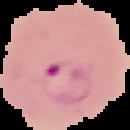

In [67]:
from tensorflow.keras.preprocessing import image

my_image = image.load_img(example_image, target_size=image_shape)
my_image

# Convert image to array

In [70]:
my_image_arr = image.img_to_array(my_image)
my_image_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [71]:
my_image_arr.shape

(130, 130, 3)

Our Model expects a 4D tensor of shape (batch_size, height, width, channels) as input. We will configure our generator to yield batches of images with the shape (1,130,130,3)

In [72]:
my_image_arr = my_image_arr.reshape(1,130,130,3)
my_image_arr.shape

(1, 130, 130, 3)

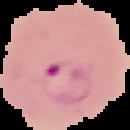

In [73]:
my_image

Clearly its infected

In [75]:
model.predict(my_image_arr)

1/1 [==============================] - 1s 772ms/step


array([[0.000553]], dtype=float32)

In [76]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

Clearly It shows it is a parasitized cell

**Well Done**